In [10]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [11]:
num_classes=1
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
model.classifier[4] = nn.Sequential(
    nn.Conv2d(256, num_classes, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),

)
model.load_state_dict(torch.load("best_model.pt"))
model.eval()


C:\Users\Akash Potti\anaconda3\envs\general\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Akash Potti\anaconda3\envs\general\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [12]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    preprocess = torchvision.transforms.Compose([
        torchvision.transforms.Resize((128, 128)),  
        torchvision.transforms.ToTensor(),        
    ])
    return preprocess(image).unsqueeze(0)  


In [34]:
def visualize_segmentation(image, segmentation_mask):
    segmentation_mask = torchvision.transforms.functional.resize(segmentation_mask, size=image.size[::-1], interpolation=Image.NEAREST)
    
    mask = segmentation_mask.squeeze().detach().numpy()
    mask = np.where(mask > 0.5, 1, 0)  
    segmented_image = np.array(image)
    
    if segmented_image.shape[0:2] != mask.shape:
        mask = np.array(Image.fromarray(mask.astype('uint8')).resize((segmented_image.shape[1], segmented_image.shape[0]), Image.NEAREST))
    
    segmented_image[mask == 1] = [255, 0, 0]  
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(segmented_image)
    axes[1].set_title('Segmented Image')
    axes[1].axis('off')
    plt.show()

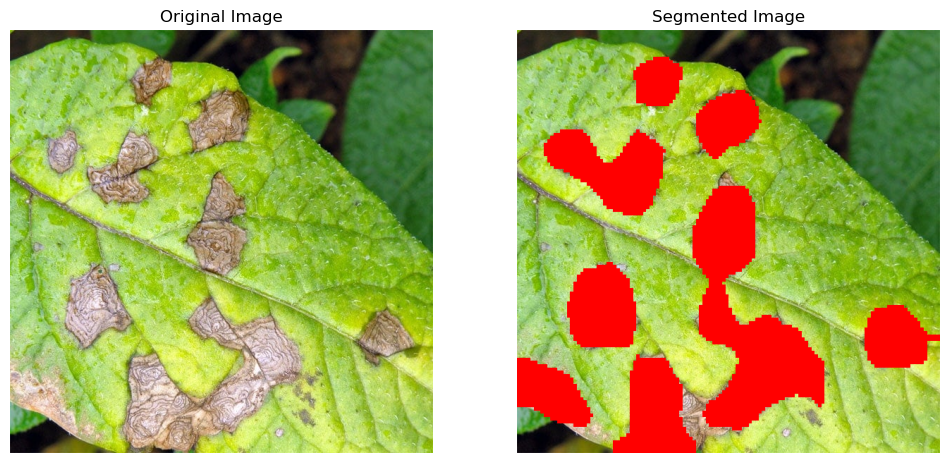

In [35]:
image_path = "potato-blight.jpg"
input_image = preprocess_image(image_path)

with torch.no_grad():
    output = model(input_image)['out']

visualize_segmentation(Image.open(image_path), output)